# <font color='Green'>Sarcastic Comment Classification </font>   

# <font color='Brown'>Author - Ishant Gupta</font> 

## Preprocessing - Train Data

## <font color='Blue'>Observation</font> 
#### NB_Classifier = Using stopwords there was a decline in accuracy of 1%
#### Random_Forest = Using stopwords and n_grams=(1,1) accuracy improved from 65% to 75%
#### XGB_Classifier = Tuning the paramters using Grid Search improved the accuracy to 99.18%
#### SVM = Tunning the paramters using Grid Search improved the accuracy from 53% to 74%
#### CNN_Yon_Kim = A slow learning rate decrease the loss and improves the accuracy to 74.33% in 30 Epochs

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import emoji
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfid = TfidfVectorizer()
vect = CountVectorizer()
vect_stopwords = CountVectorizer(stop_words='english')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
def load_file(filename):
    file = open(filename, 'r')
    text = file.read()
    return text.split("\n")

In [3]:
def get_data(filepath):
    tweets = load_file(filepath)

In [4]:

def get_emoji_dictionary():
    emojis = load_file(emoji_filename)
    emoji_dict = {}
    for line in emojis:
        line = line.split(" ", 1)
        emoji = line[0]
        description = line[1]
        emoji_dict[emoji] = description
    return emoji_dict

In [5]:
def strict_clean(tweets):
        file = open(filename, 'r')
        text = file.read()
        text = text.split('\n')
        strict_tweets = []
        emoji_dict = get_emoji_dictionary()
        for tweet in text:
            strict_tweet = []
            for word in tweet.split():
                if '#' in word:
                    continue
                if '@' in word:
                    continue
                if 'http' in word:
                    continue
                if check_if_emoji(word, emoji_dict):
                    continue
                strict_tweet.append(word)
            strict_tweets.append(' '.join(strict_tweet))
        return strict_tweets

In [6]:
def check_if_emoji(word, emoji_dict):
    emojis = list(word)
    for em in emojis:
        if em in emoji_dict.keys() or em in emoji.UNICODE_EMOJI:
            return True
    return False

# EDIT FILEPATH

In [7]:
emoji_filename = 'emoji_list.txt'
filename = 'Train_v1.txt'

In [8]:
train = get_data(filename)

In [9]:
l = []
with open(filename,'r') as f:
    text = f.read()
    l = text.split("\n")

In [10]:
strict_tweets = strict_clean(l)

In [11]:
listoflist = []
for i in strict_tweets:
    listoflist.append((i.split(' ',2)))
    

In [12]:
df = pd.DataFrame(listoflist,columns=['trainsen','labels','tweet'])

In [13]:
len(df)

39781

In [14]:
df_labels = df['labels']

In [15]:
df_tweet = df['tweet']

In [16]:
df = df.drop(labels='trainsen',axis=1)

In [17]:
df['labels'].value_counts()

0    21292
1    18488
Name: labels, dtype: int64

In [18]:
count = df['labels'].value_counts()
counts = pd.DataFrame({'labels':count.index, 'count':count.values})
#print(counts)

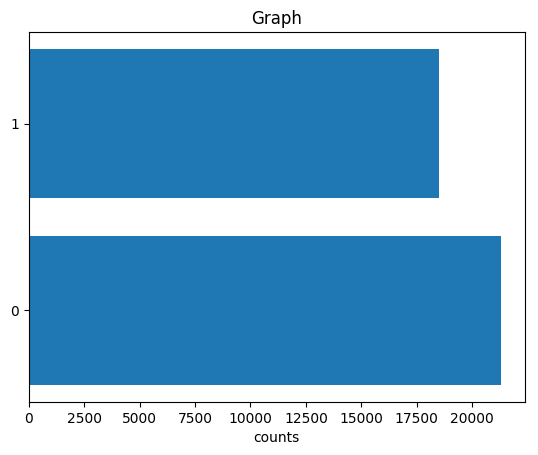

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = counts['labels']
y_pos = np.arange(len(objects))
performance = counts['count']
 
plt.barh(y_pos, performance, align='center', alpha=1)
plt.yticks(y_pos, objects)
plt.xlabel('counts')
plt.title('Graph')
plt.show()

In [20]:
df.head()


,labels,tweet
0,0,i hope youre lurking rn. i want to listen to h...
1,0,05 really taught me a valuable lesson I'm neve...
2,0,"Never had a voice to protest, so you fed me sh..."
3,0,Rest in peace & love to you and your family
4,0,100 days until Christmas! soon ready yet


In [21]:
df=df[~df['tweet'].isnull()]

In [22]:
msk = np.random.rand(len(df)) < 0.8

In [23]:
df_train = df[msk]

In [24]:
df_test = df[~msk]

In [25]:
count = df_train['labels'].value_counts()
counts = pd.DataFrame({'labels':count.index, 'count':count.values})
print(counts)

   count labels
0  17014      0
1  14789      1


In [26]:
count = df_test['labels'].value_counts()
counts = pd.DataFrame({'labels':count.index, 'count':count.values})
print(counts)

   count labels
0   4277      0
1   3697      1


## Naive Bayes 

In [27]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                     ('tfidf', TfidfTransformer(use_idf=False,sublinear_tf=True)),
                     ('clf', MultinomialNB(alpha=0.31,fit_prior=False)),])
text_clf = text_clf.fit(df_train.tweet, df_train.labels)

In [28]:
predicted = text_clf.predict(df_test.tweet)
text_clf_accuracy = metrics.accuracy_score(df_test.labels,predicted)
print("Accuracy: %.2f%%" % (text_clf_accuracy * 100.0))

Accuracy: 76.37%


In [29]:
text_clf_conf_mat = confusion_matrix(df_test.labels, predicted)
print(text_clf_conf_mat)

[[3320  957]
 [ 927 2770]]


In [144]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False),
                'clf__alpha': (1e-2, 1e-3,3e-1),
                'clf__analyzer': ('word','char'),
                'clf__lowercase':(True,False),
                'clf__fit_prior':(True,False),
                'tfidf__sublinear_tf' : (True,False),
                'tfidf__smooth_idf':(True,False),
                }
param = {'vect__analyzer': ('word','char'),
                'vect__lowercase':(True,False),}

In [145]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False),
                'clf__alpha': (1e-2, 1e-3,3e-1),
                'clf__analyzer': ('word','char'),
                'clf__lowercase':(True,False),
                'clf__fit_prior':(True,False),
                'tfidf__sublinear_tf' : (True,False),
                'tfidf__smooth_idf':(True,False),
                }
gs_clf = GridSearchCV(text_clf, param, n_jobs=-1)
gs_clf = gs_clf.fit(df_train.tweet, df_train.labels)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [146]:
gs_clf.best_params_

{'vect__analyzer': 'word', 'vect__lowercase': True}

In [75]:
gs_clf.best_score_


{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [38]:
x_train = df_train.tweet
y_train = df_train.labels
x_test = df_test.tweet
y_test = df_test.labels
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

In [84]:
NB.fit(x_train_dtm,y_train)
NB_BOW_y_predict = NB.predict(x_test_dtm)
NB_BOW_accuracy = metrics.accuracy_score(y_test,NB_BOW_y_predict)
print("Accuracy: %.2f%%" % (NB_BOW_accuracy * 100.0))

Accuracy: 74.53%


In [29]:
NB_BOW_conf_mat = confusion_matrix(y_test, NB_BOW_y_predict)
print(NB_BOW_conf_mat)

[[3034 1175]
 [ 893 2759]]


In [31]:
print("f1_score,precision, recall, average = macro")
print(f1_score(y_test, NB_BOW_y_predict, average="macro"))
print(precision_score(y_test, NB_BOW_y_predict, average="macro"))
print(recall_score(y_test, NB_BOW_y_predict, average="macro")) 
print("f1_score,precision, recall, average = micro")
print(f1_score(y_test, NB_BOW_y_predict, average="micro"))
print(precision_score(y_test, NB_BOW_y_predict, average="micro"))
print(recall_score(y_test, NB_BOW_y_predict, average="micro")) 
print("f1_score,precision, recall, average = weighted")
NB_BOW_f1_score = f1_score(y_test, NB_BOW_y_predict, average="weighted")
NB_BOW_precision_score = precision_score(y_test, NB_BOW_y_predict, average="weighted")
NB_BOW_recall_score = recall_score(y_test, NB_BOW_y_predict, average="weighted")
print(NB_BOW_f1_score)
print(NB_BOW_precision_score)
print(NB_BOW_recall_score) 

f1_score,precision, recall, average = macro
0.7298957054465194
0.7296970552952721
0.7303324363133377
f1_score,precision, recall, average = micro
0.7306860124729542
0.7306860124729541
0.7306860124729541
f1_score,precision, recall, average = weighted
0.7308719670674092
0.7312946015053737
0.7306860124729541


## Random Forest

In [179]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),stop_words='english',lowercase=True,analyzer='word')),
                     ('tfidf', TfidfTransformer(use_idf=True,sublinear_tf=True)),
                     ('clf', RandomForestClassifier(max_depth=None, min_samples_leaf=2, n_estimators=64)),])
text_clf = text_clf.fit(df_train.tweet, df_train.labels)

In [178]:
predicted = text_clf.predict(df_test.tweet)
text_clf_accuracy = metrics.accuracy_score(df_test.labels,predicted)
print("Accuracy: %.2f%%" % (text_clf_accuracy * 100.0))

Accuracy: 74.87%


In [158]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False),
                'clf__n_estimators': [16,32,54,64],
                'clf__min_samples_split': [2,3,4],
                'clf__max_depth':[10,20,30],
                'clf__criterion':('gini','entropy'),
                'tfidf__sublinear_tf' : (True,False),
                'tfidf__smooth_idf':(True,False),
              'vect__analyzer': ('word','char'),
                'vect__lowercase':(True,False),
                }
params = {'tfidf__use_idf': (True, False),
           'tfidf__sublinear_tf' : (True,False),
          'tfidf__smooth_idf':(True,False),
         }
gs_clf = GridSearchCV(text_clf, params, n_jobs=-1)
gs_clf = gs_clf.fit(df_train.tweet, df_train.labels)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [159]:
gs_clf.best_params_

{'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': False}

In [32]:
rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, n_estimators=54)
rf.fit(x_train_dtm,y_train)
rf_BOW_predict = rf.predict(x_test_dtm)
rf_BOW_accuracy = metrics.accuracy_score(y_test,rf_BOW_predict)
print("Accuracy: %.2f%%" % (rf_BOW_accuracy * 100.0))

Accuracy: 65.86%


In [33]:
rf_BOW_conf_mat = confusion_matrix(y_test, rf_BOW_predict)
print(rf_BOW_conf_mat)

[[3911  248]
 [2421 1238]]


In [34]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, rf_BOW_predict, average="macro"))
print(precision_score(y_test, rf_BOW_predict, average="macro"))
print(recall_score(y_test, rf_BOW_predict, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, rf_BOW_predict, average="micro"))
print(precision_score(y_test, rf_BOW_predict, average="micro"))
print(recall_score(y_test, rf_BOW_predict, average="micro")) 
print("f1_score,precision,recall, average = weighted")
rf_BOW_f1_score = f1_score(y_test, rf_BOW_predict, average="weighted")
rf_BOW_precission = precision_score(y_test, rf_BOW_predict, average="weighted")
rf_BOW_recall_score = recall_score(y_test, rf_BOW_predict, average="weighted")
print(f1_score(y_test, rf_BOW_predict, average="weighted"))
print(precision_score(y_test, rf_BOW_predict, average="weighted"))
print(recall_score(y_test, rf_BOW_predict, average="weighted")) 

f1_score,precision,recall, average = macro
0.6134176927439958
0.7253826831008129
0.6393570455508593
f1_score,precision,recall, average = micro
0.6586083397288309
0.6586083397288309
0.6586083397288309
f1_score,precision,recall, average = weighted
0.6218708627748293
0.7184930480025894
0.6586083397288309


## XGBClassifier

In [31]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),stop_words='english',lowercase=True,analyzer='word')),
                     ('tfidf', TfidfTransformer(use_idf=True,sublinear_tf=True)),
                     ('clf', XGBClassifier(learning_rate =0.1, n_jobs=-1,
n_estimators=1000,
max_depth=200,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27)),])
text_clf = text_clf.fit(df_test.tweet, df_test.labels)

In [32]:
predicted = text_clf.predict(df_test.tweet)
text_clf_accuracy = metrics.accuracy_score(df_test.labels,predicted)
print("Accuracy: %.2f%%" % (text_clf_accuracy * 100.0))

Accuracy: 99.18%


In [33]:
confusion_matrix(df_test.labels,predicted)

array([[4261,   16],
       [  49, 3648]])

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False),
                'clf__n_estimators': [16,32,54,64],
                'clf__min_samples_split': [2,3,4],
                'clf__max_depth':[10,20,30],
                'clf__criterion':('gini','entropy'),
                'tfidf__sublinear_tf' : (True,False),
                'tfidf__smooth_idf':(True,False),
              'vect__analyzer': ('word','char'),
                'vect__lowercase':(True,False),
                }
params = {'clf__max_depth':[10,20,30,100,200,1000],
         }
gs_clf = GridSearchCV(text_clf, params, n_jobs=-1)
gs_clf = gs_clf.fit(df_train.tweet, df_train.labels)


In [ ]:
gs_clf.best_params_

In [35]:
model = XGBClassifier(learning_rate =0.1,
n_estimators=1000,
max_depth=10,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=27)
model.fit(x_train_dtm, y_train)
# make predictions for test data
XGB_BOW_y_pred = model.predict(x_test_dtm)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
XGB_BOW_accuracy = accuracy_score(y_test, XGB_BOW_y_pred)
print("Accuracy: %.2f%%" % (XGB_BOW_accuracy * 100.0))

Accuracy: 78.86%


/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
XGB_BOW_conf_mat = confusion_matrix(y_test, XGB_BOW_y_pred)
print(XGB_BOW_conf_mat)

[[3407  752]
 [ 901 2758]]


In [37]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, XGB_BOW_y_pred, average="macro"))
print(precision_score(y_test, XGB_BOW_y_pred, average="macro"))
print(recall_score(y_test, XGB_BOW_y_pred, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, XGB_BOW_y_pred, average="micro"))
print(precision_score(y_test, XGB_BOW_y_pred, average="micro"))
print(recall_score(y_test, XGB_BOW_y_pred, average="micro")) 
print("f1_score,precision,recall, average = weighted")
XGB_BOW_f1_score = f1_score(y_test, XGB_BOW_y_pred, average="weighted")
XGB_BOW_recall_score = recall_score(y_test, XGB_BOW_y_pred, average="weighted")
XGB_BOW_precision_score = precision_score(y_test, XGB_BOW_y_pred, average="weighted")
print(f1_score(y_test, XGB_BOW_y_pred, average="weighted"))
print(recall_score(y_test, XGB_BOW_y_pred, average="weighted")) 
print(precision_score(y_test, XGB_BOW_y_pred, average="weighted"))

f1_score,precision,recall, average = macro
0.7870976870926178
0.7883046052266107
0.7864725809893045
f1_score,precision,recall, average = micro
0.7885648503453568
0.7885648503453568
0.7885648503453568
f1_score,precision,recall, average = weighted
0.7882280131733105
0.7885648503453568
0.7884676660779555


## SVM Model

In [ ]:

import multiprocessing
if __name__ == '__main__':
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

    scores = ['precision', 'recall']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score,n_jobs=-1,pre_dispatch='2*n_jobs')
        clf.fit(x_train_dtm, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(x_test_dtm)
        print(classification_report(y_true, y_pred))
        print()


In [36]:
model_ = svm.SVC(kernel ='rbf', C = 100, gamma= 0.001)


In [39]:
model_.fit(x_train_dtm,y_train)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
svm_BOW_Predict = model_.predict(x_test_dtm)


In [41]:
svm_BOW_accuracy = metrics.accuracy_score(y_test,svm_BOW_Predict)
print("Accuracy: %.2f%%" % (svm_BOW_accuracy * 100.0))

Accuracy: 53.20%


In [42]:
svm_BOW_conf_mat = confusion_matrix(y_test, svm_BOW_Predict)
print(svm_BOW_conf_mat)

[[4159    0]
 [3659    0]]


In [43]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, svm_BOW_Predict, average="macro"))
print(precision_score(y_test, svm_BOW_Predict, average="macro"))
print(recall_score(y_test, svm_BOW_Predict, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, svm_BOW_Predict, average="micro"))
print(precision_score(y_test, svm_BOW_Predict, average="micro"))
print(recall_score(y_test, svm_BOW_Predict, average="micro")) 
print("f1_score,precision,recall, average = weighted")
SVM_BOW_f1_score = f1_score(y_test, svm_BOW_Predict, average="weighted")
SVM_BOW_recall_score = recall_score(y_test, svm_BOW_Predict, average="weighted")
SVM_BOW_precision_score = precision_score(y_test, svm_BOW_Predict, average="weighted")
print(f1_score(y_test, svm_BOW_Predict, average="weighted"))
print(recall_score(y_test, svm_BOW_Predict, average="weighted")) 
print(precision_score(y_test, svm_BOW_Predict, average="weighted"))

f1_score,precision,recall, average = macro
0.3472488937129498
0.2659887439242773
0.5
f1_score,precision,recall, average = micro
0.5319774878485546
0.5319774878485546
0.5319774878485546
f1_score,precision,recall, average = weighted


/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ishant/anaconda3/l

0.3694571882712096
0.5319774878485546
0.283000047577659


/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
accu = pd.DataFrame({"Model" : ["Naive bayes","Random Forest","SVM","XGB"],
                     "Accuracy" : [NB_BOW_accuracy,rf_BOW_accuracy,svm_BOW_accuracy,XGB_BOW_accuracy],
                     "Precision" :[NB_BOW_precision_score,rf_BOW_precission,SVM_BOW_precision_score,XGB_BOW_precision_score],
                     "Recall" : [NB_BOW_recall_score,rf_BOW_recall_score,SVM_BOW_recall_score,XGB_BOW_recall_score],
                     "F1_Weighted" : [NB_BOW_f1_score,rf_BOW_f1_score,SVM_BOW_f1_score,XGB_BOW_f1_score]
                    })
accu

,Model,Accuracy,Precision,Recall,F1_Weighted
0,Naive bayes,0.740599,0.741502,0.740599,0.740813
1,Random Forest,0.658608,0.718493,0.658608,0.621871
2,SVM,0.531977,0.283000,0.531977,0.369457
3,XGB,0.788565,0.788468,0.788565,0.788228


## Using TF-IDF Vectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# x = vectorizer.fit_transform(data.sent)
# print(vectorizer.get_feature_names())
# print(X.shape)

x_train = df_train.tweet
y_train = df_train.labels
x_test = df_test.tweet
y_test = df_test.labels
x_train_dtm1 = vectorizer.fit_transform(x_train)
x_test_dtm1 = vectorizer.transform(x_test)


## Naive Bayes

In [252]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2),lowercase=True,analyzer='word')),
                     ('tfidf', TfidfTransformer(use_idf=True,sublinear_tf=False,smooth_idf=False)),
                     ('clf', MultinomialNB(alpha=2.0,fit_prior=False)),])
text_clf = text_clf.fit(df_train.tweet, df_train.labels)

In [253]:
predicted = text_clf.predict(df_test.tweet)
text_clf_accuracy = metrics.accuracy_score(df_test.labels,predicted)
print("Accuracy: %.2f%%" % (text_clf_accuracy * 100.0))

Accuracy: 76.81%


In [254]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False),
                'clf__alpha': (1e-2, 1e-3,3e-1,2.0),
                'vect__analyzer': ('word','char'),
                'vect__lowercase':(True,False),
                'clf__fit_prior':(True,False),
                'tfidf__smooth_idf':(True,False),
                }
params = {'clf__alpha': (2.0,3.0),
         }
gs_clf = GridSearchCV(text_clf, params, n_jobs=-1)
gs_clf = gs_clf.fit(df_train.tweet, df_train.labels)
gs_clf.best_params_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'clf__alpha': 2.0}

In [46]:
NB.fit(x_train_dtm1,y_train)
NB_TF_predict = NB.predict(x_test_dtm)
NB_TF_accuracy = metrics.accuracy_score(y_test,NB_TF_predict)
print("Accuracy: %.2f%%" % (NB_TF_accuracy * 100.0))

Accuracy: 74.48%


In [47]:
NB_TF_conf_mat = confusion_matrix(y_test, NB_TF_predict)
print(NB_TF_conf_mat)

[[3097 1062]
 [ 933 2726]]


In [48]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, NB_TF_predict, average="macro"))
print(precision_score(y_test, NB_TF_predict, average="macro"))
print(recall_score(y_test, NB_TF_predict, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, NB_TF_predict, average="micro"))
print(precision_score(y_test, NB_TF_predict, average="micro"))
print(recall_score(y_test, NB_TF_predict, average="micro")) 
print("f1_score,precision,recall, average = weighted")
NB_TF_f1_score = f1_score(y_test, NB_TF_predict, average="weighted")
NB_TF_recall_score = recall_score(y_test, NB_TF_predict, average="weighted")
NB_TF_precision_score = precision_score(y_test, NB_TF_predict, average="weighted")
print(f1_score(y_test, NB_TF_predict, average="weighted"))
print(recall_score(y_test, NB_TF_predict, average="weighted")) 
print(precision_score(y_test, NB_TF_predict, average="weighted"))

f1_score,precision,recall, average = macro
0.7442436995604204
0.7440636619231162
0.7448312273648832
f1_score,precision,recall, average = micro
0.7448196469685342
0.7448196469685342
0.7448196469685342
f1_score,precision,recall, average = weighted
0.7450199090053177
0.7448196469685342
0.7456256144962938


## RandomForestClassifier

In [297]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,1),stop_words='english',lowercase=True,analyzer='word')),
                     ('tfidf', TfidfTransformer(use_idf=True,sublinear_tf=False)),
                     ('clf', RandomForestClassifier(max_depth=None, min_samples_leaf=2, n_estimators=1024)),])
text_clf = text_clf.fit(df_train.tweet, df_train.labels)

In [299]:
predicted = text_clf.predict(df_test.tweet)
text_clf_accuracy = metrics.accuracy_score(df_test.labels,predicted)
print("Accuracy: %.2f%%" % (text_clf_accuracy * 100.0))

Accuracy: 75.52%


In [300]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
                'tfidf__use_idf': (True, False),
                'clf__n_estimators': [16,32,54,64],
                'clf__min_samples_split': [2,3,4],
                'clf__max_depth':[10,20,30],
                'clf__criterion':('gini','entropy'),
                'tfidf__sublinear_tf' : (True,False),
                'tfidf__smooth_idf':(True,False),
              'vect__analyzer': ('word','char'),
                'vect__lowercase':(True,False),
                }
params = {'tfidf__use_idf': (True, False),
           'tfidf__sublinear_tf' : (True,False),
          'tfidf__smooth_idf':(True,False),
         }
gs_clf = GridSearchCV(text_clf, params, n_jobs=-1)
gs_clf = gs_clf.fit(df_train.tweet, df_train.labels)
gs_clf.best_params_

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': False}

In [49]:
rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, n_estimators=54)
rf.fit(x_train_dtm1,y_train)
rf_TF_predict = rf.predict(x_test_dtm1)
rf_TF_accuracy = metrics.accuracy_score(y_test,rf_TF_predict)
print("Accuracy: %.2f%%" % (rf_TF_accuracy * 100.0))

Accuracy: 66.54%


In [50]:
rf_TF_conf_mat = confusion_matrix(y_test, rf_TF_predict)
print(rf_TF_conf_mat)

[[3918  241]
 [2375 1284]]


In [51]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, rf_TF_predict, average="macro"))
print(precision_score(y_test, rf_TF_predict, average="macro"))
print(recall_score(y_test, rf_TF_predict, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, rf_TF_predict, average="micro"))
print(precision_score(y_test, rf_TF_predict, average="micro"))
print(recall_score(y_test, rf_TF_predict, average="micro")) 
print("f1_score,precision,recall, average = weighted")
rf_TF_f1_score = f1_score(y_test, rf_TF_predict, average="weighted")
rf_TF_recall_score = recall_score(y_test, rf_TF_predict, average="weighted")
rf_TF_precision_score = precision_score(y_test, rf_TF_predict, average="weighted")
print(f1_score(y_test, rf_TF_predict, average="weighted"))
print(recall_score(y_test, rf_TF_predict, average="weighted")) 
print(precision_score(y_test, rf_TF_predict, average="weighted"))

f1_score,precision,recall, average = macro
0.6225416719819704
0.73228187447411
0.6464844644564145
f1_score,precision,recall, average = micro
0.6653875671527245
0.6653875671527245
0.6653875671527245
f1_score,precision,recall, average = weighted
0.6306749094859101
0.6653875671527245
0.7252669513070182


## SVM Classifier

In [52]:
model_ = svm.SVC()
model_.fit(x_train_dtm1,y_train)
svm_TF_Predict = model_.predict(x_test_dtm1)
svm_TF_accuracy  = metrics.accuracy_score(y_test,svm_TF_Predict)
print("Accuracy: %.2f%%" % (svm_TF_accuracy * 100.0))

Accuracy: 53.20%


In [53]:
svm_TF_conf_mat = confusion_matrix(y_test, svm_TF_Predict)
print(svm_TF_conf_mat)

[[4159    0]
 [3659    0]]


In [54]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, svm_TF_Predict, average="macro"))
print(precision_score(y_test, svm_TF_Predict, average="macro"))
print(recall_score(y_test, svm_TF_Predict, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, svm_TF_Predict, average="micro"))
print(precision_score(y_test, svm_TF_Predict, average="micro"))
print(recall_score(y_test, svm_TF_Predict, average="micro")) 
print("f1_score,precision,recall, average = weighted")
svm_TF_f1_score = f1_score(y_test, svm_TF_Predict, average="weighted")
svm_TF_recall_score = recall_score(y_test, svm_TF_Predict, average="weighted")
svm_TF_precision_score = precision_score(y_test, svm_TF_Predict, average="weighted")
print(f1_score(y_test, svm_TF_Predict, average="weighted"))
print(recall_score(y_test, svm_TF_Predict, average="weighted")) 
print(precision_score(y_test, svm_TF_Predict, average="weighted"))

f1_score,precision,recall, average = macro
0.3472488937129498
0.2659887439242773
0.5
f1_score,precision,recall, average = micro
0.5319774878485546
0.5319774878485546
0.5319774878485546
f1_score,precision,recall, average = weighted


/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.3694571882712096
0.5319774878485546
0.283000047577659


/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## XGBClassifier

In [55]:
model = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 saaale_pos_weight=1,
 seed=27)
model.fit(x_train_dtm1, y_train)
# make predictions for test data
xgb_TF_pred = model.predict(x_test_dtm1)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
xgb_tf_accuracy = accuracy_score(y_test, xgb_TF_pred)
print("Accuracy: %.2f%%" % (xgb_tf_accuracy * 100.0))

Accuracy: 77.67%


/home/ishant/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [56]:
xgb_TF_conf_mat = confusion_matrix(y_test, xgb_TF_pred)
print(xgb_TF_conf_mat)

[[3387  772]
 [ 974 2685]]


In [57]:
print("f1_score,precision,recall, average = macro")
print(f1_score(y_test, xgb_TF_pred, average="macro"))
print(precision_score(y_test, xgb_TF_pred, average="macro"))
print(recall_score(y_test, xgb_TF_pred, average="macro")) 
print("f1_score,precision,recall, average = micro")
print(f1_score(y_test, xgb_TF_pred, average="micro"))
print(precision_score(y_test, xgb_TF_pred, average="micro"))
print(recall_score(y_test, xgb_TF_pred, average="micro")) 
print("f1_score,precision,recall, average = weighted")
xgb_TF_f1_score = f1_score(y_test, xgb_TF_pred, average="weighted")
xgb_TF_recall_score = recall_score(y_test, xgb_TF_pred, average="weighted")
xgb_TF_precision_score = precision_score(y_test, xgb_TF_pred, average="weighted")
print(f1_score(y_test, xgb_TF_pred, average="weighted"))
print(recall_score(y_test, xgb_TF_pred, average="weighted")) 
print(precision_score(y_test, xgb_TF_pred, average="weighted"))

f1_score,precision,recall, average = macro
0.7748539296487187
0.7766708585453533
0.7740927537332809
f1_score,precision,recall, average = micro
0.7766692248656946
0.7766692248656946
0.7766692248656946
f1_score,precision,recall, average = weighted
0.7761468749599552
0.7766692248656946
0.7766699549614713


## USING TF

In [58]:
accu = pd.DataFrame({"Model" : ["Naive bayes","Random Forest","SVM","XGB"],
                     "Accuracy" : [NB_TF_accuracy,rf_TF_accuracy,svm_TF_accuracy,xgb_tf_accuracy],
                     "Precision" :[NB_TF_precision_score,rf_TF_precision_score,svm_TF_precision_score,xgb_TF_precision_score],
                     "Recall" : [NB_TF_recall_score,rf_TF_recall_score,svm_TF_recall_score,xgb_TF_recall_score],
                     "F1_Weighted" : [NB_TF_f1_score,rf_TF_f1_score,svm_TF_f1_score,xgb_TF_f1_score]
                    })
accu

,Model,Accuracy,Precision,Recall,F1_Weighted
0,Naive bayes,0.744820,0.745626,0.744820,0.745020
1,Random Forest,0.665388,0.725267,0.665388,0.630675
2,SVM,0.531977,0.283000,0.531977,0.369457
3,XGB,0.776669,0.776670,0.776669,0.776147


## CNN Text Classification

In [53]:
df_test.to_csv('df_test.csv',header=True,index=False)

In [33]:
import torch
import pandas as pd
import numpy as np
from collections import Counter

In [34]:
print('total texts in train:',len(df_train.tweet))
print('total texts in test:',len(df_test.tweet))


total texts in train: 31920
total texts in test: 7857


In [35]:
vocab = Counter()

for text in df_train.tweet:
    for word in text.split(' '):
        vocab[word.lower()]+=1

for text in df_test.tweet:
    for word in text.split(' '):
        vocab[word.lower()]+=1

total_words = len(vocab)
print("vocab length: ",(total_words))

def get_word_2_index(vocab):
    word2index = {}
    for i,word in enumerate(vocab):
        word2index[word.lower()] = i

    return word2index
word2index = get_word_2_index(vocab)
print("length of word2index: ",len(word2index))

vocab length:  39742
length of word2index:  39742


In [36]:
def get_batch(df,i,batch_size):
    batches = []
    results = []
    texts = df.tweet[i*batch_size:i*batch_size+batch_size]
    categories = df.labels[i*batch_size:i*batch_size+batch_size]
    for text in texts:
        layer = np.zeros(total_words,dtype=float)
        for word in text.split(' '):
            layer[word2index[word.lower()]] += 1

        batches.append(layer)

    for category in categories:
        index_y = -1
        if category == 0:
            index_y = 0
        else:
            index_y = 1
        results.append(index_y)


    return np.array(batches),np.array(results)


In [41]:
# Parameters
learning_rate = 0.001
num_epochs = 5
batch_size = 200
display_step = 1

# Network Parameters
hidden_size = 1000      # 1st layer and 2nd layer number of features
input_size = total_words # Words in vocab
num_classes = 2         # Categories: graphics, sci.space and baseball

In [42]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [43]:
class OurNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(OurNet, self).__init__()
        self.layer_1 = nn.Linear(input_size,hidden_size, bias=True)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, hidden_size, bias=True)
        self.output_layer = nn.Linear(hidden_size, num_classes, bias=True)

    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.output_layer(out)
        return out

In [44]:
net = OurNet(input_size, hidden_size, num_classes)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [45]:
# Train the Model
for epoch in range(num_epochs):
    total_batch = int(len(df_train.tweet)/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x,batch_y = get_batch(df_train,i,batch_size)
        articles = Variable(torch.FloatTensor(batch_x))
        labels = Variable(torch.LongTensor(batch_y))
        #print("articles",articles)
        #print(batch_x, labels)
        #print("size labels",labels.size())

        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(articles)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                   %(epoch+1, num_epochs, i+1, len(df_train.tweet)//batch_size, loss.data[0]))


/home/ishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/5], Step [100/159], Loss: 0.0000


/home/ishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [2/5], Step [100/159], Loss: 0.0000


/home/ishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [3/5], Step [100/159], Loss: 0.0000


/home/ishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [4/5], Step [100/159], Loss: 0.0000


/home/ishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [5/5], Step [100/159], Loss: 0.0000


In [69]:
# Test the Model
correct = 0
total = 0
total_test_data = len(df_test.labels)
batch_x_test,batch_y_test = get_batch(df_test,0,total_test_data)
articles = Variable(torch.FloatTensor(batch_x_test))
labels = torch.LongTensor(batch_y_test)
outputs = net(articles)
_, predicted = torch.max(outputs.data, 1)
total += labels.size(0)
correct += (predicted == labels).sum()

print('Accuracy of the network on the 1180 test articles: %d %%' % (100 * correct / total))

Accuracy of the network on the 1180 test articles: 100 %


## CNN_MODEL_YonKim_Implementation

In [440]:
from sklearn.metrics import confusion_matrix
import re
import random
import torch
import torchtext
from torchtext import data
from torchtext import vocab
import spacy

In [441]:
nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])

In [442]:
def tokenizer(s): 
    return [w.text.lower() for w in nlp(tweet_clean(s))]

In [443]:
def tweet_clean(text):
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # remove non alphanumeric character
    text = re.sub(r'https?:/\/\S+', ' ', text) # remove links
    return text.strip()

In [444]:
TEXT = data.Field(sequential=True, 
                       tokenize=tokenizer, 
                       include_lengths=True, 
                       use_vocab=True,
                       fix_length=30)
LABEL = data.Field(sequential=False, 
                         use_vocab=False, 
                         pad_token=None, 
                         unk_token=None,
                         dtype=torch.float)

In [445]:
train_val_fields = [
    ('labels', LABEL), # process it as label
    ('tweet', TEXT) # process it as text
]

In [446]:
train, test = data.TabularDataset.splits(path='/home/ishant/ML/Sarcastic Model/Sarcasm_detection/', 
                                            format='csv', 
                                            train='df_train.csv', 
                                            validation='df_test.csv', 
                                            fields=train_val_fields, 
                                            skip_header=True)

In [447]:
SEED = 1234
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

In [448]:
train, valid = train.split(random_state=random.seed(SEED))

In [449]:
len(train), len(test) ,len(valid)

(22344, 7857, 9576)

In [450]:
train.fields.items()

dict_items([('labels', <torchtext.data.field.Field object at 0x7fa33030f160>), ('tweet', <torchtext.data.field.Field object at 0x7fa33030f0f0>)])

In [451]:
example = train[20000]

In [452]:
type(example)

torchtext.data.example.Example

In [453]:
print(example.tweet)
print(example.labels)

['the', 'photo', 'is', 'not', 'right', 'surprised', 'he', 'didn', 't', 'delete', 'it', 'even', 'if', 'it', 's', 'from', 'san', 'francisco', 'could', 'the', 'black', 'on', 'white', 'rate', 'be', 'that', 'high']
0


In [454]:
vec = vocab.Vectors('glove.twitter.27B.50d.txt', '/home/ishant/ML/Sarcastic Model/Sarcasm_detection/')

In [455]:
TEXT.build_vocab(train, max_size=25000, vectors=vec)
LABEL.build_vocab(train)

In [456]:
type(TEXT.vocab.vectors[TEXT.vocab.stoi['the']])

torch.Tensor

In [457]:
print(TEXT.vocab.vectors.shape)

torch.Size([17568, 50])


In [163]:
BATCH_SIZE = 64
traindl, valdl = data.BucketIterator.splits(datasets=(train,valid), # specify train and validation Tabulardataset
                                            batch_sizes=(BATCH_SIZE,BATCH_SIZE),  # batch size of train and validation
                                            sort_key=lambda x: len(x.tweet), # on what attribute the text should be sorted
                                            device=-1, # -1 mean cpu and 0 or None mean gpu
                                            sort_within_batch=True, 
                                            repeat=False)

The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.
The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.


## with test set

In [458]:
BATCH_SIZE = 64
traindl, valdl,testdl = data.BucketIterator.splits(datasets=(train,valid,test), # specify train and validation Tabulardataset
                                            batch_sizes=(BATCH_SIZE,BATCH_SIZE,BATCH_SIZE),  # batch size of train and validation
                                            sort_key=lambda x: len(x.tweet), # on what attribute the text should be sorted
                                            device=-1, # -1 mean cpu and 0 or None mean gpu
                                            sort_within_batch=True, 
                                            repeat=False)

The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.
The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.
The `device` argument should be set by using `torch.device` or passing a string as an argument. This behavior will be deprecated soon and currently defaults to cpu.


In [459]:
print(len(traindl), len(valdl))

350 150


In [460]:
batch = next(iter(traindl)) # BucketIterator return a batch object
print(type(batch))

<class 'torchtext.data.batch.Batch'>


In [461]:
(batch.labels)

tensor([1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [462]:
class BatchGenerator:
    def __init__(self, dl, x_field, y_field):
        self.dl, self.x_field, self.y_field = dl, x_field, y_field
        
    def __len__(self):
        return len(self.dl)
    
    def __iter__(self):
        for batch in self.dl:
            X = getattr(batch, self.x_field)
            y = getattr(batch, self.y_field)
            yield (X,y)

In [463]:
train_iterator = BatchGenerator(traindl, 'tweet', 'labels')
valid_iterator = BatchGenerator(valdl, 'tweet', 'labels')
test_iterator = BatchGenerator(testdl, 'tweet', 'labels')

In [464]:
batch = next(iter(train_iterator)) # BucketIterator return a batch object
print(type(batch))

<class 'tuple'>


In [465]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv_0 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[0],embedding_dim))
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[1],embedding_dim))
        self.conv_2 = nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(filter_sizes[2],embedding_dim))
        self.fc = nn.Linear(len(filter_sizes)*n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [sent len, batch size]
        
        x = x.permute(1, 0)
                
        #x = [batch size, sent len]
        
        embedded = self.embedding(x)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved_0 = F.relu(self.conv_0(embedded).squeeze(3))
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat((pooled_0, pooled_1, pooled_2), dim=1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [466]:

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(fs,embedding_dim)) for fs in filter_sizes])
        self.fc = nn.Linear(len(filter_sizes)*n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [sent len, batch size]
        #save_x = x
        #print(x)
        x = x.permute(1, 0)
                
        #x = [batch size, sent len]
        
        embedded = self.embedding(x)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim=1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [467]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 50
N_FILTERS = 100
FILTER_SIZES = [3,4,5]
OUTPUT_DIM = 1
DROPOUT = 0.5

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)

In [468]:
pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0431,  0.5039,  0.2709,  ..., -0.2238, -0.6603, -0.7065],
        ...,
        [-0.6835, -0.1286, -0.2167,  ..., -0.9572,  0.3453, -0.2812],
        [ 0.4758,  0.7332,  0.7221,  ..., -0.5614,  0.7186, -0.2680],
        [-0.5404,  1.1035, -0.1208,  ...,  1.0089, -0.4560, -0.4926]])

In [469]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(),lr=0.0001)

criterion = nn.BCEWithLogitsLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)
criterion = criterion.to(device)

In [470]:
import torch.nn.functional as F

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(F.sigmoid(preds))
    #print(y.numpy(),rounded_preds.shape)
    #save_preds.append(rounded_preds.detach().numpy())
    #save_y.append(y.detach().numpy())
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum()/len(correct)
    return acc,rounded_preds.detach().numpy(),y.detach().numpy()

In [471]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        #print(type(batch.tweet))
        predictions = model(batch.tweet[0]).squeeze(1)
        
        loss = criterion(predictions, batch.labels)
        
        acc,__,___ = binary_accuracy(predictions, batch.labels)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [472]:

def evaluate(model, iterator, criterion):
   
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.tweet[0]).squeeze(1)
            
            loss = criterion(predictions, batch.labels)
            
            acc,__,___ = binary_accuracy(predictions, batch.labels)
            save_preds.append(__)
            save_y.append(___)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [473]:
N_EPOCHS = 30
save_y = []
save_preds = []
final_accu = 1.0
for epoch in range(N_EPOCHS):

    train_loss, train_acc = train(model, traindl, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valdl, criterion)
    #flat_list_y = np.array([item for sublist in save_y for item in sublist])
    #flat_list_preds = np.array([item for sublist in save_preds for item in sublist])
    #confusion_matrix(flat_list_y,flat_list_preds)
    final_accu = (valid_acc*100)
    print('Epoch:{}'.format(epoch), 'Train Loss:{:.3f}'.format(train_loss), 'Train Acc:{:.3f}'.format((train_acc*100)), 'Val. Loss:{:.3f}'.format(valid_loss), 'Val. Acc:{:.2f}'.format(valid_acc*100))

Epoch:0 Train Loss:0.696 Train Acc:53.603 Val. Loss:0.672 Val. Acc:58.67
Epoch:1 Train Loss:0.671 Train Acc:58.277 Val. Loss:0.657 Val. Acc:61.95
Epoch:2 Train Loss:0.651 Train Acc:61.647 Val. Loss:0.645 Val. Acc:63.31
Epoch:3 Train Loss:0.634 Train Acc:64.411 Val. Loss:0.634 Val. Acc:64.63
Epoch:4 Train Loss:0.617 Train Acc:66.567 Val. Loss:0.623 Val. Acc:65.81
Epoch:5 Train Loss:0.603 Train Acc:67.723 Val. Loss:0.614 Val. Acc:66.54
Epoch:6 Train Loss:0.587 Train Acc:69.228 Val. Loss:0.604 Val. Acc:67.50
Epoch:7 Train Loss:0.572 Train Acc:70.643 Val. Loss:0.594 Val. Acc:68.41
Epoch:8 Train Loss:0.556 Train Acc:71.915 Val. Loss:0.585 Val. Acc:69.13
Epoch:9 Train Loss:0.540 Train Acc:73.009 Val. Loss:0.576 Val. Acc:69.62
Epoch:10 Train Loss:0.529 Train Acc:73.799 Val. Loss:0.569 Val. Acc:70.04
Epoch:11 Train Loss:0.514 Train Acc:74.964 Val. Loss:0.562 Val. Acc:70.51
Epoch:12 Train Loss:0.500 Train Acc:75.786 Val. Loss:0.555 Val. Acc:70.91
Epoch:13 Train Loss:0.486 Train Acc:76.696 Val. 

In [474]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

flat_list_y = np.array([item for sublist in save_y for item in sublist])
flat_list_preds = np.array([item for sublist in save_preds for item in sublist])

confusion_matrix(flat_list_y,flat_list_preds)

array([[115697,  37363],
       [ 47269,  86951]])

In [475]:
cnn_f1_score = (f1_score(flat_list_y, flat_list_preds, average="weighted"))
cnn_recall_score = (recall_score(flat_list_y, flat_list_preds, average="weighted")) 
cnn_precision_score =(precision_score(flat_list_y, flat_list_preds, average="weighted"))

In [476]:
import pandas as pd
accu = pd.DataFrame({"Model" : ["CNN"],
                     "Accuracy" : [final_accu],
                     "Precision" :[cnn_precision_score],
                     "Recall" : [cnn_recall_score],
                     "F1_Weighted" : [cnn_f1_score]
                    })
accu

,Accuracy,F1_Weighted,Model,Precision,Recall
0,74.833333,0.704376,CNN,0.70504,0.705402


In [478]:
test_loss, test_acc = evaluate(model, testdl, criterion)

In [479]:
print('Test. Loss:{:.3f}'.format(valid_loss), 'Test. Acc:{:.2f}'.format(valid_acc*100))

Test. Loss:0.522 Test. Acc:74.83


In [480]:
def predict(sentence):
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1)
    prediction = F.sigmoid(model(tensor))
    ans = prediction.item()
    if ans > 0.5:
        return '1'
    else:
        return '0'

In [481]:
a = test.examples[200]

In [482]:
sent = " ".join(a.tweet)
lbl = a.labels
sent,lbl

('arrests after sporadic fighting at ballymena v coleraine match at showgrounds two people have been arrested',
 '0')

In [483]:
predict(sent), lbl 

('0', '0')

## LSTM Model

In [ ]:
from sklearn.metrics import confusion_matrix
import re
import random
import torch
import torchtext
from torchtext import data
from torchtext import vocab
import spacy

In [ ]:
nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])

In [ ]:
def tokenizer(s): 
    return [w.text.lower() for w in nlp(tweet_clean(s))]

In [ ]:
def tweet_clean(text):
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # remove non alphanumeric character
    text = re.sub(r'https?:/\/\S+', ' ', text) # remove links
    return text.strip()

In [ ]:
TEXT = data.Field(sequential=True, 
                       tokenize=tokenizer, 
                       include_lengths=True, 
                       use_vocab=True,
                       fix_length=30)
LABEL = data.Field(sequential=False, 
                         use_vocab=False, 
                         pad_token=None, 
                         unk_token=None,
                         dtype=torch.float)

In [ ]:
train_val_fields = [
    ('labels', LABEL), # process it as label
    ('tweet', TEXT) # process it as text
]

In [ ]:
train, test = data.TabularDataset.splits(path='/home/ishant/ML/Sarcastic Model/Sarcasm_detection/', 
                                            format='csv', 
                                            train='df_train.csv', 
                                            validation='df_test.csv', 
                                            fields=train_val_fields, 
                                            skip_header=True)

SEED = 1234
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

train, valid = train.split(random_state=random.seed(SEED))

In [ ]:
vec = vocab.Vectors('glove.twitter.27B.50d.txt', '/home/ishant/ML/Sarcastic Model/Sarcasm_detection/')

In [ ]:
TEXT.build_vocab(train, max_size=25000, vectors=vec)
LABEL.build_vocab(train)

In [ ]:
BATCH_SIZE = 64
traindl, valdl,testdl = data.BucketIterator.splits(datasets=(train,valid,test), # specify train and validation Tabulardataset
                                            batch_sizes=(BATCH_SIZE,BATCH_SIZE,BATCH_SIZE),  # batch size of train and validation
                                            sort_key=lambda x: len(x.tweet), # on what attribute the text should be sorted
                                            device=-1, # -1 mean cpu and 0 or None mean gpu
                                            sort_within_batch=True, 
                                            repeat=False)

In [484]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F

class LSTMClassifier(nn.Module):
	def __init__(self, batch_size, output_size, hidden_size, vocab_size, embedding_length, weights):
		super(LSTMClassifier, self).__init__()
		
		"""
		Arguments
		---------
		batch_size : Size of the batch which is same as the batch_size of the data returned by the TorchText BucketIterator
		output_size : 2 = (pos, neg)
		hidden_sie : Size of the hidden_state of the LSTM
		vocab_size : Size of the vocabulary containing unique words
		embedding_length : Embeddding dimension of GloVe word embeddings
		weights : Pre-trained GloVe word_embeddings which we will use to create our word_embedding look-up table 
		
		"""
		
		self.batch_size = batch_size
		self.output_size = output_size
		self.hidden_size = hidden_size
		self.vocab_size = vocab_size
		self.embedding_length = embedding_length
		
		self.word_embeddings = nn.Embedding(vocab_size, embedding_length)# Initializing the look-up table.
		self.word_embeddings.weight = nn.Parameter(weights, requires_grad=False) # Assigning the look-up table to the pre-trained GloVe word embedding.
		self.lstm = nn.LSTM(embedding_length, hidden_size,batch_first=True)
		self.label = nn.Linear(hidden_size, output_size)
		
	def forward(self, input_sentence, batch_size=None):
	
		""" 
		Parameters
		----------
		input_sentence: input_sentence of shape = (batch_size, num_sequences)
		batch_size : default = None. Used only for prediction on a single sentence after training (batch_size = 1)
		
		Returns
		-------
		Output of the linear layer containing logits for positive & negative class which receives its input as the final_hidden_state of the LSTM
		final_output.shape = (batch_size, output_size)
		
		"""
		
		''' Here we will map all the indexes present in the input sequence to the corresponding word vector using our pre-trained word_embedddins.'''
		input = self.word_embeddings(input_sentence) # embedded input of shape = (batch_size, num_sequences,  embedding_length)
		input = input.permute(1, 0, 2) # input.size() = (num_sequences, batch_size, embedding_length)
		#if batch_size is None:
		#	h_0 = Variable(torch.zeros(1, self.batch_size, self.hidden_size)) # Initial hidden state of the LSTM
		#	c_0 = Variable(torch.zeros(1, self.batch_size, self.hidden_size)) # Initial cell state of the LSTM
		#else:
		h_0 = Variable(torch.zeros(1, self.batch_size, self.hidden_size))
		c_0 = Variable(torch.zeros(1, self.batch_size, self.hidden_size))
		output, (final_hidden_state, final_cell_state) = self.lstm(input, (h_0, c_0))
		final_output = self.label(final_hidden_state[-1]) # final_hidden_state.size() = (1, batch_size, hidden_size) & final_output.size() = (batch_size, output_size)
		
		return final_output


In [485]:
learning_rate = 2e-5
batch_size = 64
output_size = 2
hidden_size = 256
embedding_length = 50
word_embeddings = TEXT.vocab.vectors
vocab_size = len(TEXT.vocab)

lstm_model = LSTMClassifier(batch_size, output_size, hidden_size, vocab_size, embedding_length, word_embeddings)

In [486]:
lstm_model

LSTMClassifier(
  (word_embeddings): Embedding(17568, 50)
  (lstm): LSTM(50, 256, batch_first=True)
  (label): Linear(in_features=256, out_features=2, bias=True)
)

In [487]:
def clip_gradient(model, clip_value):
    params = list(filter(lambda p: p.grad is not None, model.parameters()))
    for p in params:
        p.grad.data.clamp_(-clip_value, clip_value)

In [ ]:
def train_model(model, train_iter, epoch):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.cuda()
    optim = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))
    steps = 0
    model.train()
    for idx, batch in enumerate(train_iter):
        print(idx)
        text = batch.tweet[0]
        target = batch.labels
        target = torch.autograd.Variable(target).long()
        if torch.cuda.is_available():
            text = text.cuda()
            target = target.cuda()
        if (text.size()[0] is not 64):# One of the batch returned by BucketIterator has length different than 32.
            continue
        optim.zero_grad()
        prediction = model(text)
        loss = loss_fn(prediction, target)
        num_corrects = (torch.max(prediction, 1)[1].view(target.size()).data == target.data).float().sum()
        acc = 100.0 * num_corrects/len(batch)
        loss.backward()
        clip_gradient(model, 1e-1)
        optim.step()
        steps += 1
        
        if steps % 100 == 0:
            print ("Epoch: ".format(epoch+1), "Idx:".format(idx+1), "Training Loss:.4f ".format(loss.item()), "Training Accuracy: .2f ".format(acc.item()))
        
        total_epoch_loss += loss.item()
        total_epoch_acc += acc.item()
        
    return total_epoch_loss/len(train_iter), total_epoch_acc/len(train_iter)


In [ ]:
def eval_model(model, val_iter):
    total_epoch_loss = 0
    total_epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(val_iter):
            text = batch.tweet[0]
            if (text.size()[0] is not 64):
                continue
            target = batch.labels
            target = torch.autograd.Variable(target).long()
            if torch.cuda.is_available():
                text = text.cuda()
                target = target.cuda()
            prediction = model(text)
            loss = loss_fn(prediction, target)
            num_corrects = (torch.max(prediction, 1)[1].view(target.size()).data == target.data).sum()
            acc = 100.0 * num_corrects/len(batch)
            total_epoch_loss += loss.item()
            total_epoch_acc += acc.item()

    return total_epoch_loss/len(val_iter), total_epoch_acc/len(val_iter)

In [491]:
loss_fn = F.cross_entropy

In [ ]:
for epoch in range(10):
    train_loss, train_acc = train_model(lstm_model, traindl, epoch)
    val_loss, val_acc = eval_model(lstm_model, valdl)
    
    #print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%, Val. Loss: {val_loss:3f}, Val. Acc: {val_acc:.2f}%')
    print('Epoch:{}'.format(epoch), 'Train Loss:{:.3f}'.format(train_loss), 'Train Acc:{:.3f}'.format((train_acc*100)), 'Val. Loss:{:.3f}'.format(valid_loss), 'Val. Acc:{:.2f}'.format(valid_acc*100))